In [1]:
# from src.algos.stochastic.oracle import Oracle
# from src.algos.stochastic.random import StochasticRandomized
# from src.algos.stochastic.sqrt_first import SqrtFirst
# from src.algos.stochastic.proposed import StochasticSubmodularPolicy
from src.algos.offline.improved import SubmodularPolicyImproved
from src.algos.offline.proposed import SubmodularPolicy
from src.algos.offline.random import Randomized
from src.algos.offline.greedy import MinimumCostGreedy
from src.algos.offline.genetic import GeneticAlgorithm
from src.models.bean import *
import pandas as pd
import numpy as np
np.random.seed(42)

# Define small-scale dataset sizes
n_range = [9, 11, 13, 15, 17]

l = 3
beta = 0.3

# Initialize log to store results
log = []

# Conduct experiments for each dataset size
for n in n_range:
    tasks_universal = [Task(idx=i) for i in range(n)]
    vehicles_universal = [Vehicle(idx=i,
                                  p={j: np.random.randint(1, 100) / 100 for j in range(n)},
                                  r=np.random.randint(1, 100) / 100,
                                  c={j: np.random.randint(1, 100) for j in range(n)}) for i in range(n)]

    problem = Problem(tasks=tasks_universal,
                      vehicles=vehicles_universal,
                      l=l, beta=beta)

    # Define algorithms to test
    info = {
        'MinimumCostGreedy': {'class': MinimumCostGreedy, 'costs': []},
        'SubmodularPolicyImproved': {'class': SubmodularPolicyImproved, 'costs': []},
        'SubmodularPolicy': {'class': SubmodularPolicy, 'costs': []},
        'GeneticAlgorithm': {'class': GeneticAlgorithm, 'costs': []},
        'Randomized': {'class': Randomized, 'costs': []},

    }

    # Find optimal solution using DFS
    optimal_recruited_vehicles: Dict[int, Set[int]] = {task_id: set() for task_id in problem.tasks}
    for task_id, task in problem.tasks.items():
        optimal_cost, optimal_solution = problem.find_optimal_solution(task_id)
        optimal_recruited_vehicles[task_id] = optimal_solution
    optimal_cost = problem.compute_total_expected_cost(optimal_recruited_vehicles)

    # Run each algorithm and record costs
    for algo_name, algo_info in info.items():
        algo_class = algo_info['class']
        algo = algo_class(problem)
        algo.run_framework()
        algo_info['costs'].append(algo.get_total_expected_cost())

    # Log results
    log.append({
        'n': n,
        'Optimal': optimal_cost,
        'MinimumCostGreedy': info['MinimumCostGreedy']['costs'][0],
        'SubmodularPolicyImproved': info['SubmodularPolicyImproved']['costs'][0],
        'SubmodularPolicy': info['SubmodularPolicy']['costs'][0],
        'GeneticAlgorithm': info['GeneticAlgorithm']['costs'][0],
        'Randomized': info['Randomized']['costs'][0],
    })

# Convert log to DataFrame and output as LaTeX table
df_results = pd.DataFrame(log)
latex_table = df_results.to_latex(index=False, float_format="%.2f")
print(latex_table)

  0%|          | 0/466 [00:00<?, ?it/s]

  0%|          | 0/466 [00:00<?, ?it/s]

  0%|          | 0/466 [00:00<?, ?it/s]

  0%|          | 0/466 [00:00<?, ?it/s]

  0%|          | 0/466 [00:00<?, ?it/s]

  0%|          | 0/466 [00:00<?, ?it/s]

  0%|          | 0/466 [00:00<?, ?it/s]

  0%|          | 0/466 [00:00<?, ?it/s]

  0%|          | 0/466 [00:00<?, ?it/s]

  0%|          | 0/1981 [00:00<?, ?it/s]

  0%|          | 0/1981 [00:00<?, ?it/s]

  0%|          | 0/1981 [00:00<?, ?it/s]

  0%|          | 0/1981 [00:00<?, ?it/s]

  0%|          | 0/1981 [00:00<?, ?it/s]

  0%|          | 0/1981 [00:00<?, ?it/s]

  0%|          | 0/1981 [00:00<?, ?it/s]

  0%|          | 0/1981 [00:00<?, ?it/s]

  0%|          | 0/1981 [00:00<?, ?it/s]

  0%|          | 0/1981 [00:00<?, ?it/s]

  0%|          | 0/1981 [00:00<?, ?it/s]

  0%|          | 0/8100 [00:00<?, ?it/s]

  0%|          | 0/8100 [00:00<?, ?it/s]

  0%|          | 0/8100 [00:00<?, ?it/s]

  0%|          | 0/8100 [00:00<?, ?it/s]

  0%|          | 0/8100 [00:00<?, ?it/s]

  0%|          | 0/8100 [00:00<?, ?it/s]

  0%|          | 0/8100 [00:00<?, ?it/s]

  0%|          | 0/8100 [00:00<?, ?it/s]

  0%|          | 0/8100 [00:00<?, ?it/s]

  0%|          | 0/8100 [00:00<?, ?it/s]

  0%|          | 0/8100 [00:00<?, ?it/s]

  0%|          | 0/8100 [00:00<?, ?it/s]

  0%|          | 0/8100 [00:00<?, ?it/s]

  0%|          | 0/32647 [00:00<?, ?it/s]

  0%|          | 0/32647 [00:00<?, ?it/s]

  0%|          | 0/32647 [00:00<?, ?it/s]

  0%|          | 0/32647 [00:00<?, ?it/s]

  0%|          | 0/32647 [00:00<?, ?it/s]

  0%|          | 0/32647 [00:00<?, ?it/s]

  0%|          | 0/32647 [00:00<?, ?it/s]

  0%|          | 0/32647 [00:00<?, ?it/s]

  0%|          | 0/32647 [00:00<?, ?it/s]

  0%|          | 0/32647 [00:00<?, ?it/s]

  0%|          | 0/32647 [00:00<?, ?it/s]

  0%|          | 0/32647 [00:00<?, ?it/s]

  0%|          | 0/32647 [00:00<?, ?it/s]

  0%|          | 0/32647 [00:00<?, ?it/s]

  0%|          | 0/32647 [00:00<?, ?it/s]

  0%|          | 0/130918 [00:00<?, ?it/s]

  0%|          | 0/130918 [00:00<?, ?it/s]

  0%|          | 0/130918 [00:00<?, ?it/s]

  0%|          | 0/130918 [00:00<?, ?it/s]

  0%|          | 0/130918 [00:00<?, ?it/s]

  0%|          | 0/130918 [00:00<?, ?it/s]

  0%|          | 0/130918 [00:00<?, ?it/s]

  0%|          | 0/130918 [00:00<?, ?it/s]

  0%|          | 0/130918 [00:00<?, ?it/s]

  0%|          | 0/130918 [00:00<?, ?it/s]

  0%|          | 0/130918 [00:00<?, ?it/s]

  0%|          | 0/130918 [00:00<?, ?it/s]

  0%|          | 0/130918 [00:00<?, ?it/s]

  0%|          | 0/130918 [00:00<?, ?it/s]

  0%|          | 0/130918 [00:00<?, ?it/s]

  0%|          | 0/130918 [00:00<?, ?it/s]

  0%|          | 0/130918 [00:00<?, ?it/s]

\begin{tabular}{rrrrrrr}
\toprule
n & Optimal & MinimumCostGreedy & SubmodularPolicyImproved & SubmodularPolicy & GeneticAlgorithm & Randomized \\
\midrule
9 & 1228.00 & 1676.00 & 1246.00 & 1323.00 & 1405.00 & 2437.00 \\
11 & 1006.00 & 2157.00 & 1685.00 & 1732.00 & 1811.00 & 3364.00 \\
13 & 1689.00 & 2744.00 & 1812.00 & 1938.00 & 2852.00 & 4808.00 \\
15 & 2235.00 & 3703.00 & 2491.00 & 2581.00 & 3899.00 & 6374.00 \\
17 & 2489.00 & 5383.00 & 2789.00 & 2891.00 & 4378.00 & 7442.00 \\
\bottomrule
\end{tabular}



In [ ]:
# Convert log to DataFrame and output as LaTeX table
df_results = pd.DataFrame(log)
df_results['Ratio_MinimumCostGreedy'] = df_results['MinimumCostGreedy'] / df_results['Optimal']
df_results['Ratio_RTA_PI'] = df_results['SubmodularPolicyImproved'] / df_results['Optimal']
df_results['Ratio_RTA_P'] = df_results['SubmodularPolicy'] / df_results['Optimal']

# Compute average ratios
average_ratio_minimum_cost_greedy = df_results['Ratio_MinimumCostGreedy'].mean()
average_ratio_rta_pi = df_results['Ratio_RTA_PI'].mean()
average_ratio_rta_p = df_results['Ratio_RTA_P'].mean()

df_results['Ratio_RTA_Genetic'] = df_results['GeneticAlgorithm'] / df_results['Optimal']
average_ratio_rta_genetic = df_results['Ratio_RTA_Genetic'].mean()

latex_table = r"""
\begin{table}[h]
    \centering
    \caption{Performance Comparison Between Our Algorithms and the Optimal Solution}
    \label{tbl:approximation-ratio}
    \begin{tabular}{c r r r r r r}
        \toprule
        \multirow{2}{*}{$m, n$} & \multicolumn{1}{c}{Optimal} & \multicolumn{2}{c}{Minimum-Cost} & \multicolumn{2}{c}{RTA-PI} & \multicolumn{2}{c}{RTA-P} \\
        \cmidrule(lr){2-2} \cmidrule(lr){3-4} \cmidrule(lr){5-6} \cmidrule(lr){7-8}
        & \multicolumn{1}{c}{cost} & \multicolumn{1}{c}{cost} & \multicolumn{1}{c}{ratio} & \multicolumn{1}{c}{cost} & \multicolumn{1}{c}{ratio} & \multicolumn{1}{c}{cost} & \multicolumn{1}{c}{ratio} \\
        \midrule
"""

for index, row in df_results.iterrows():
    latex_table += f"        ${row['n']}$  & {row['Optimal']:.2f}  & {row['MinimumCostGreedy']:.2f}  & {row['Ratio_MinimumCostGreedy']:.2f}  & {row['RTA_PI']:.2f}  & {row['Ratio_RTA_PI']:.2f}  & {row['RTA_P']:.2f}  & {row['Ratio_RTA_P']:.2f} \\\\\n"

latex_table += r"""        \midrule
        \text{Average} & & & """ + f"{average_ratio_minimum_cost_greedy:.2f} & & {average_ratio_rta_pi:.2f} & & {average_ratio_rta_p:.2f} \\\\\n"

latex_table += r"""        \bottomrule
    \end{tabular}
\end{table}"""

print(latex_table)

KeyError: 'RTA_PI'

In [10]:
from src.algos.stochastic.oracle import Oracle
from src.algos.stochastic.random import StochasticRandomized
from src.algos.stochastic.sqrt_first import SqrtFirst
from src.algos.stochastic.proposed import StochasticSubmodularPolicy
from src.algos.stochastic.rl import StochasticReinforce
from src.algos.stochastic.mab import StochasticGreedyMAB

from src.models.bean import *
import pandas as pd
import numpy as np
np.random.seed(923520)

# Define small-scale dataset sizes
# n_range = [9, 11, 13, 15, 17]
n_range = np.array([9, 11, 13, 15, 17]) * 100

l = 3
beta = 0.3

# Initialize log to store results
log = []

# Conduct experiments for each dataset size
for n in n_range:
    tasks_universal = [Task(idx=i) for i in range(n)]
    vehicles_universal = [Vehicle(idx=i,
                                  p={j: np.random.randint(1, 100) / 100 for j in range(n)},
                                  r=np.random.randint(1, 100) / 100,
                                  c={j: np.random.randint(1, 100) for j in range(n)}) for i in range(n)]

    problem = Problem(tasks=tasks_universal,
                      vehicles=vehicles_universal,
                      l=l, beta=beta)

    # Define stochastic algorithms to test
    info = {
        'Oracle': {'class': Oracle, 'costs': []},
        'StochasticRandomized': {'class': StochasticRandomized, 'costs': []},
        'SqrtFirst': {'class': SqrtFirst, 'costs': []},
        'StochasticSubmodularPolicy': {'class': StochasticSubmodularPolicy, 'costs': []},
        'StochasticReinforce': {'class': StochasticReinforce, 'costs': []},
        'StochasticGreedyMAB': {'class': StochasticGreedyMAB, 'costs': []},
    }

    # Run each stochastic algorithm and record costs
    for algo_name, algo_info in info.items():
        algo_class = algo_info['class']
        algo = algo_class(problem)
        algo.run_framework()
        algo_info['costs'].append(algo.get_total_expected_cost())

    # Log results
    log.append({
        'n': n,
        'Oracle': info['Oracle']['costs'][0],
        'StochasticRandomized': info['StochasticRandomized']['costs'][0],
        'SqrtFirst': info['SqrtFirst']['costs'][0],
        'StochasticSubmodularPolicy': info['StochasticSubmodularPolicy']['costs'][0],
        'StochasticReinforce': info['StochasticReinforce']['costs'][0],
        'StochasticGreedyMAB': info['StochasticGreedyMAB']['costs'][0],
    })

# Convert log to DataFrame and output as LaTeX table
df_results = pd.DataFrame(log)
latex_table = df_results.to_latex(index=False, float_format="%.2f")
print(latex_table)

Starting SB3 DQN training... total_timesteps=5000
SB3 DQN training completed.
Starting SB3 DQN training... total_timesteps=5000
SB3 DQN training completed.
Starting SB3 DQN training... total_timesteps=5000
SB3 DQN training completed.
Starting SB3 DQN training... total_timesteps=5000
SB3 DQN training completed.
Starting SB3 DQN training... total_timesteps=5000
SB3 DQN training completed.
\begin{tabular}{rrrrrrr}
\toprule
n & Oracle & StochasticRandomized & SqrtFirst & StochasticSubmodularPolicy & StochasticReinforce & StochasticGreedyMAB \\
\midrule
900 & 3817.34 & 194766.50 & 703539.94 & 52259.05 & 202587.37 & 51604.92 \\
1100 & 4336.16 & 241543.56 & 973435.02 & 61102.50 & 233929.51 & 60460.87 \\
1300 & 4758.28 & 296797.86 & 1240837.79 & 71023.61 & 271944.82 & 70341.28 \\
1500 & 5046.26 & 316482.81 & 1511658.52 & 83282.97 & 295608.27 & 82620.87 \\
1700 & 5570.92 & 362201.74 & 1830883.23 & 89625.34 & 344446.96 & 89087.72 \\
\bottomrule
\end{tabular}



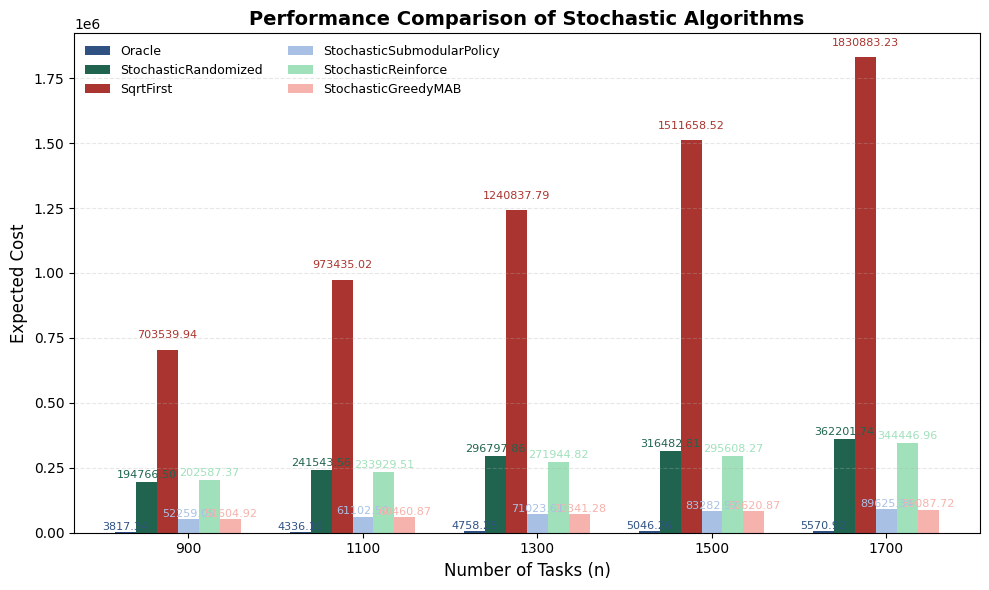

In [11]:
# ===== Visualization =====
algos = [col for col in df_results.columns if col != 'n']
x = np.arange(len(df_results['n']))
width = 0.12

# Custom color scheme
colors = [
    "#2f5283", "#20644f", "#aa342f", "#a9c0e5", "#a0e1bb", "#f6b2ac"
]

plt.figure(figsize=(10, 6))
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Plot bars and add labels
for i, algo in enumerate(algos):
    xpos = x + (i - len(algos)/2)*width
    values = df_results[algo]
    plt.bar(xpos, values, width=width, label=algo, color=colors[i % len(colors)])

    # --- Add text labels above each bar ---
    for j, val in enumerate(values):
        plt.text(xpos[j], val + 0.02 * max(values), f"{val:.2f}",
                 ha='center', va='bottom', fontsize=8, color=colors[i % len(colors)])

# Labels and style
plt.xticks(x, df_results['n'], fontsize=10)
plt.xlabel("Number of Tasks (n)", fontsize=12)
plt.ylabel("Expected Cost", fontsize=12)
plt.title("Performance Comparison of Stochastic Algorithms", fontsize=14, weight='bold')
plt.legend(frameon=False, fontsize=9, ncol=2)
plt.tight_layout()

# Save as SVG
plt.savefig('stochastic_algorithms_comparison.svg')
plt.show()